<p style="background-color:#66c2ff; font-family: Arial, sans-serif; font-size: 150%; color: white; text-align: center; border-radius: 15px; padding: 12px; border: 2px solid #004080;">Import Necessary Libraries</p>


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
style.use("fivethirtyeight")

<p style="background-color:#66c2ff; font-family: Arial, sans-serif; font-size: 150%; color: white; text-align: center; border-radius: 15px; padding: 12px; border: 2px solid #004080;">Dataset Reading</p>


In [6]:
df=pd.read_csv('/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv')

In [7]:
df


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [28]:
df.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.121951,47.408130,0.386992,-0.043719,0.060111,0.327376,0.786402,0.694364,-0.023867,0.040487,0.204181,0.662578,-0.025551
std,0.327496,10.055105,0.487458,0.902488,0.973205,1.528465,2.928380,3.334432,0.830756,0.782903,2.369341,2.231064,0.884956
min,0.000000,19.000000,0.000000,-4.218750,-2.102467,-1.327327,-1.353982,-1.101695,-2.576271,-2.703833,-3.285714,-0.767347,-4.491803
25%,0.000000,39.000000,0.000000,-0.484375,-0.521822,-0.396396,-0.380531,-0.338983,-0.499058,-0.480836,-0.476190,-0.310204,-0.475410
50%,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,54.000000,1.000000,0.515625,0.478178,0.603604,0.619469,0.661017,0.500942,0.519164,0.523810,0.689796,0.524590
max,1.000000,77.000000,1.000000,6.296875,13.278937,18.156156,26.380531,41.813559,3.069680,3.038328,47.719048,25.616327,2.918033


<p style="background-color:#66c2ff; font-family: Arial, sans-serif; font-size: 150%; color: white; text-align: center; border-radius: 15px; padding: 12px; border: 2px solid #004080;">Data Preprocessing</p>

In [8]:
print(df.isnull().sum())


Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [9]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [10]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})


In [11]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [12]:
# Value counts of categorical variables
print(df['Category'].value_counts())
print(df['Sex'].value_counts())

0    540
1     75
Name: Category, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


In [13]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

In [14]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Define the columns to be scaled using RobustScaler
cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Scale the selected columns using RobustScaler
df[cols_to_scale] = robust_scaler.fit_transform(df[cols_to_scale])


In [15]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)


Category      0.000000
Age         103.089431
Sex           0.000000
ALB           0.040650
ALP           3.701887
ALT          10.292243
AST          21.351176
BIL          30.486427
CHE           0.115138
CHOL          0.790912
CREA         14.107627
GGT          17.872905
PROT         -1.871251
dtype: float64


<p style="background-color:#66c2ff; font-family: Arial, sans-serif; font-size: 150%; color: white; text-align: center; border-radius: 15px; padding: 12px; border: 2px solid #004080;">Exploratory Data Analysis</p>

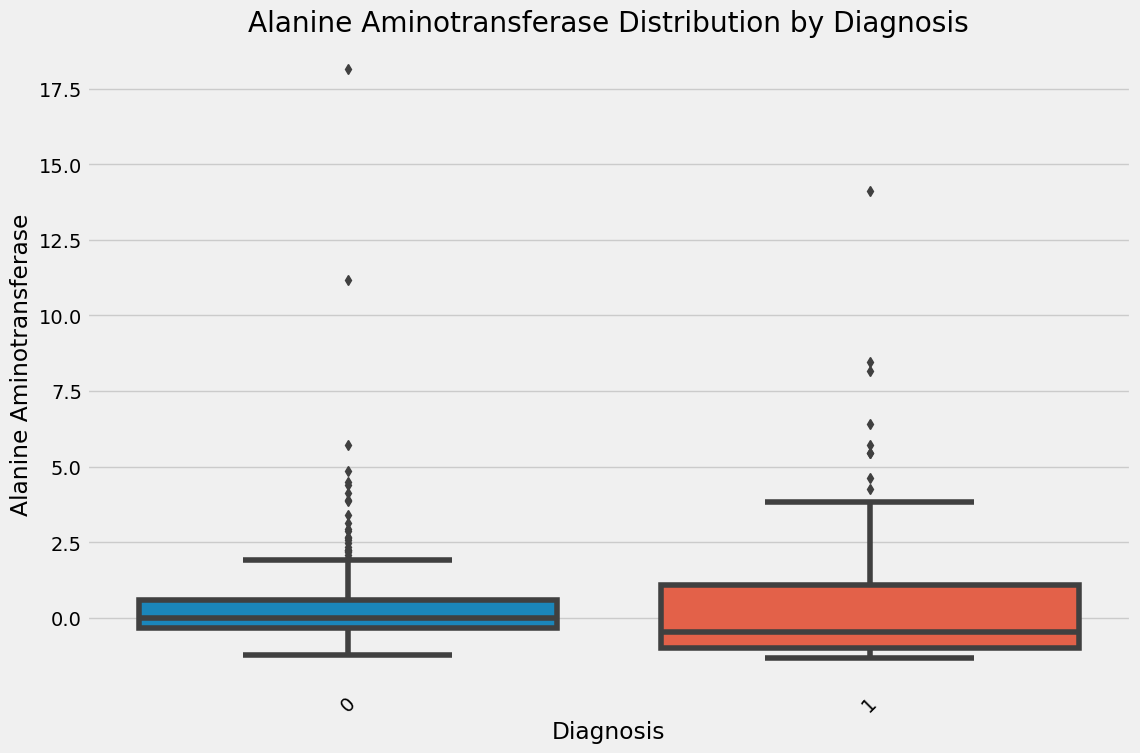

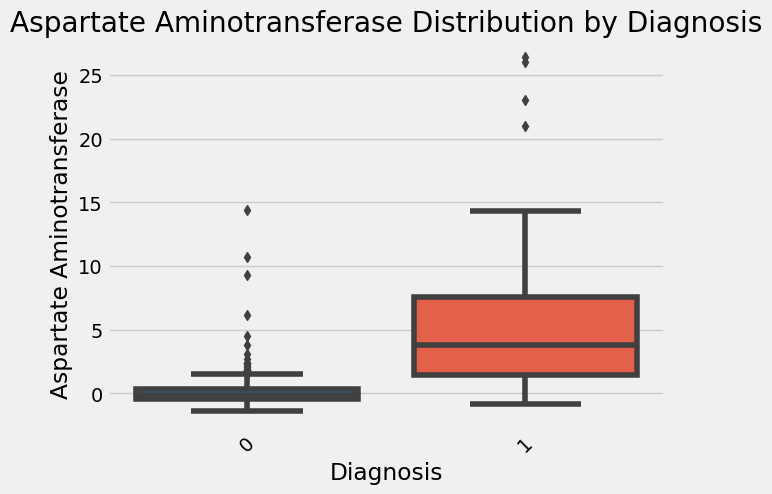

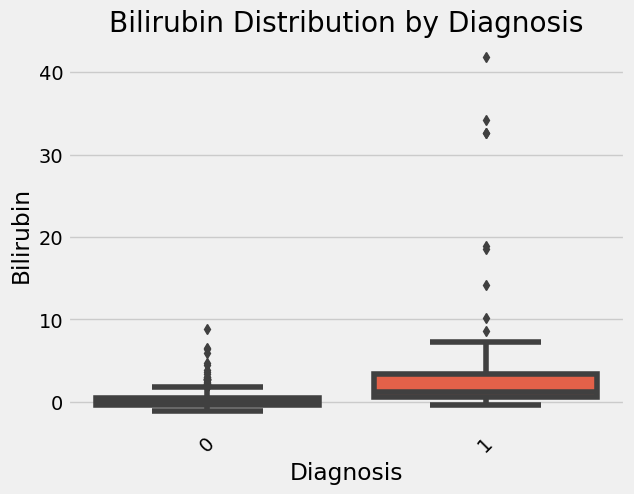

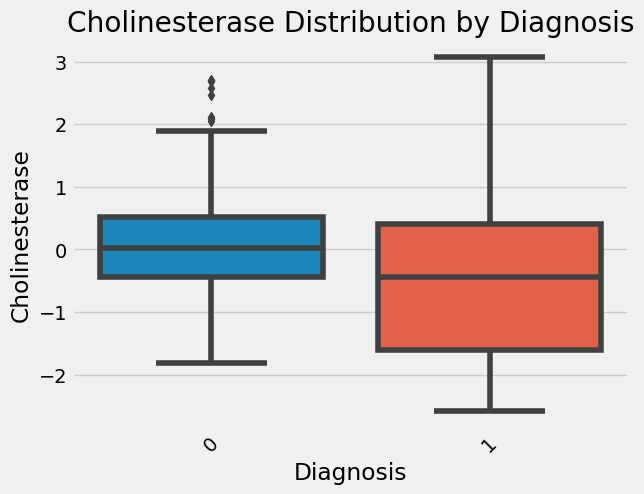

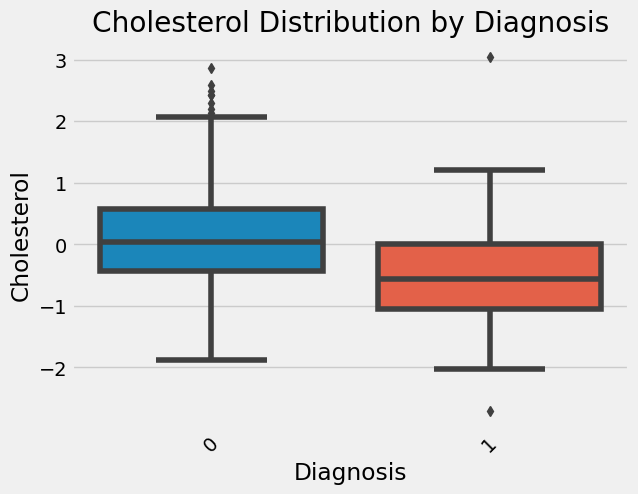

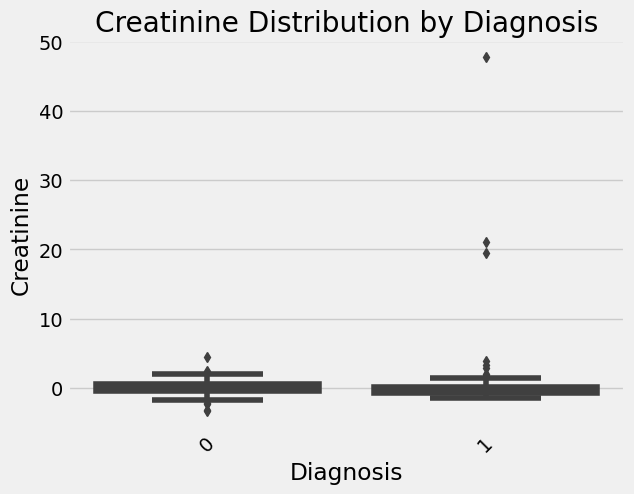

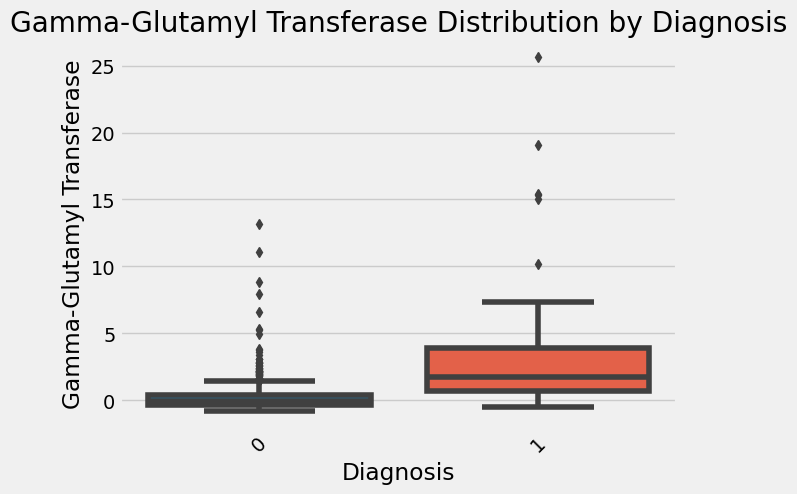

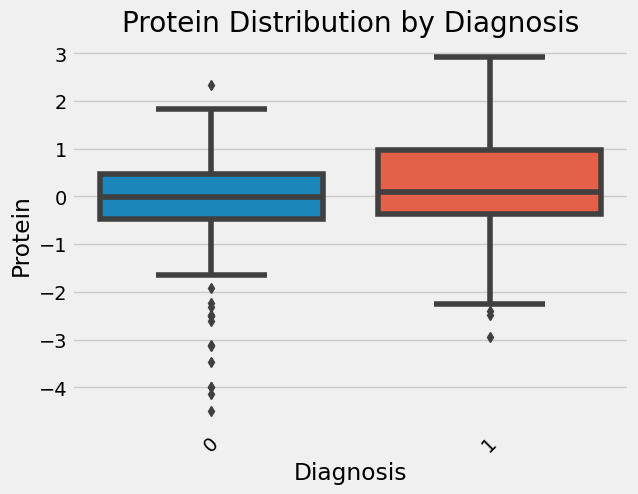

In [16]:
# List of full-form labels for laboratory attributes
lab_attributes = {
    'ALB': 'Albumin',
    'ALP': 'Alkaline Phosphatase',
    'ALT': 'Alanine Aminotransferase',
    'AST': 'Aspartate Aminotransferase',
    'BIL': 'Bilirubin',
    'CHE': 'Cholinesterase',
    'CHOL': 'Cholesterol',
    'CREA': 'Creatinine',
    'GGT': 'Gamma-Glutamyl Transferase',
    'PROT': 'Protein'
}

# Plotting laboratory data
plt.figure(figsize=(12, 8))
for col in df.columns[5:14]:
    sns.boxplot(x='Category', y=col, data=df)
    plt.title(f'{lab_attributes[col]} Distribution by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(lab_attributes[col])
    plt.xticks(rotation=45)
    plt.show()


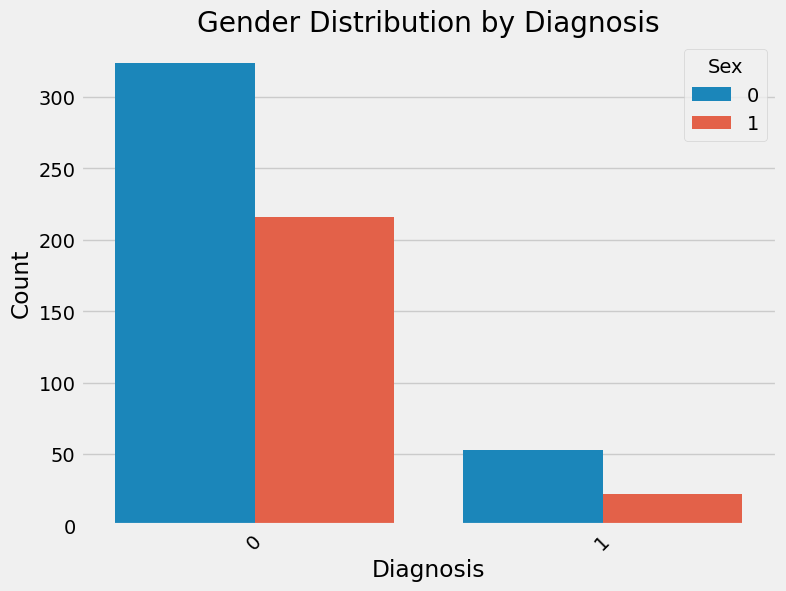

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', hue='Sex', data=df)
plt.title('Gender Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


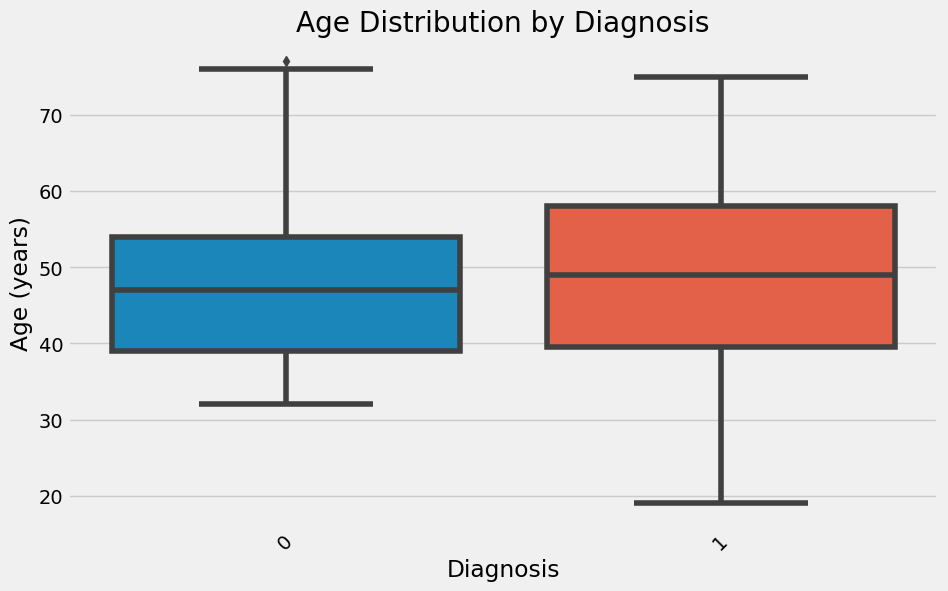

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Age', data=df)
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age (years)')
plt.xticks(rotation=45)
plt.show()


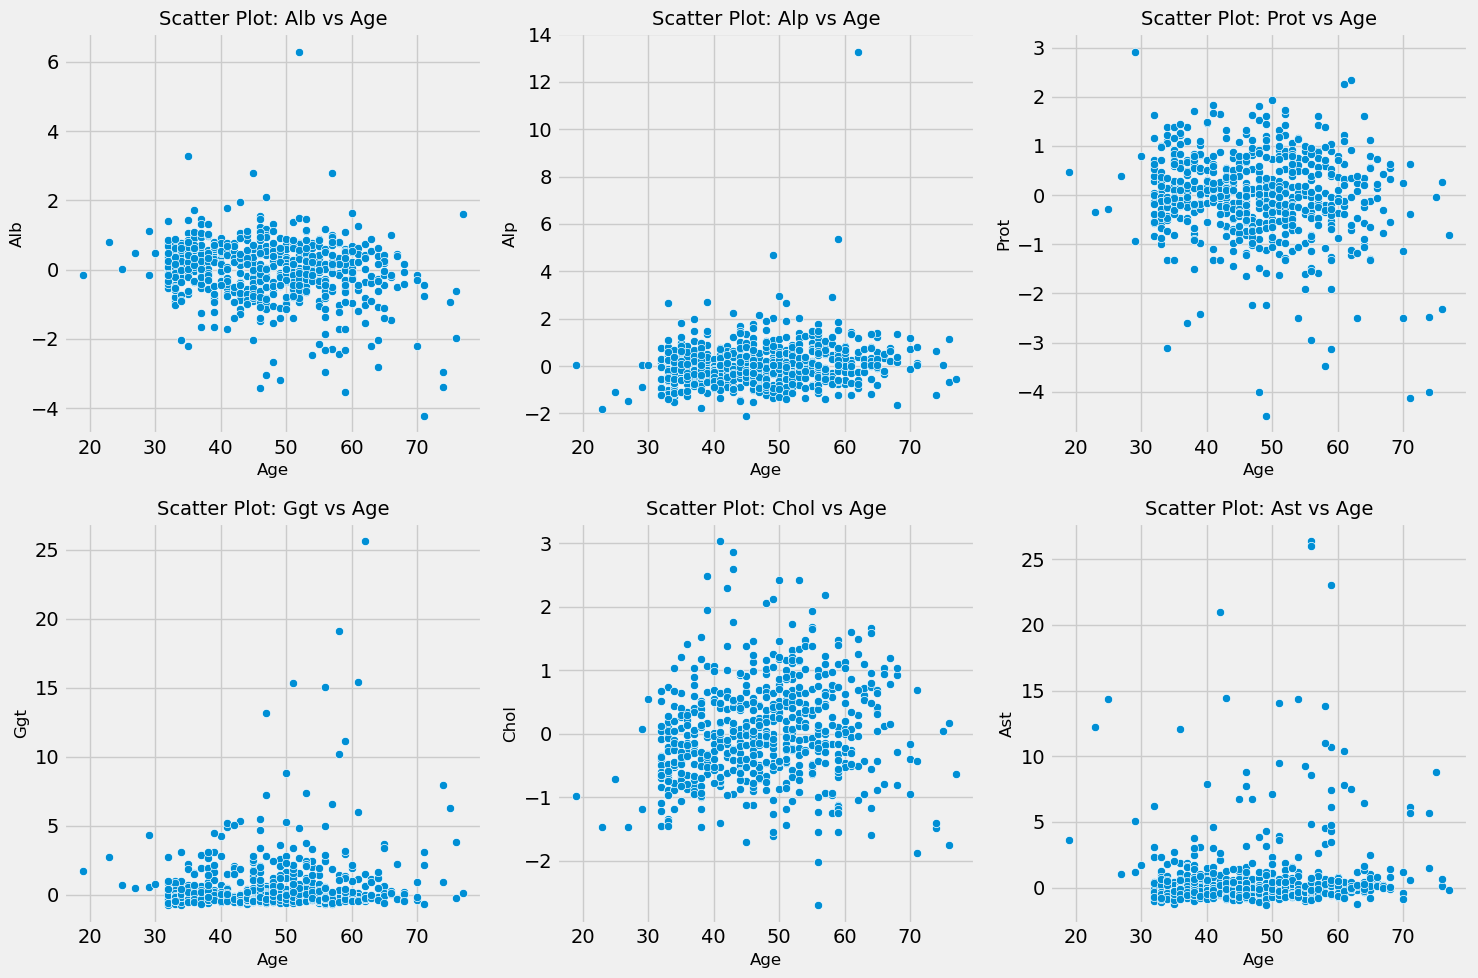

In [19]:
def plot_scatter_best_relationships(data, columns_of_interest, target_column='Age', top_n=6):
    """
    Plot scatter plots for the top N medical parameters with the highest correlation with the target column.

    Parameters:
    - data (DataFrame): Input DataFrame containing features.
    - columns_of_interest (list): List of columns to plot against the target column.
    - target_column (str): The column against which the other columns will be plotted.
    - top_n (int): Number of top medical parameters to consider.

    Returns:
    - None
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr()
    
    # Sort the correlations with the target column in descending order
    sorted_correlations = correlation_matrix[target_column].abs().sort_values(ascending=False)
    
    # Select the top N medical parameters
    top_columns = sorted_correlations.index[1:top_n+1]  # Exclude the target column
    
    # Create subplots
    num_plots = len(top_columns)
    num_cols = min(3, num_plots)
    num_rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    # Plot scatter plots for each pair of columns
    for i, col in enumerate(top_columns):
        sns.scatterplot(x=target_column, y=col, data=data, ax=axes[i])
        axes[i].set_title(f'Scatter Plot: {col.capitalize()} vs {target_column.capitalize()}', fontsize=14)
        axes[i].set_xlabel(target_column.capitalize(), fontsize=12)
        axes[i].set_ylabel(col.capitalize(), fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Define the columns you are interested in
columns_of_interest = ["ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]

# Example usage:
plot_scatter_best_relationships(df, columns_of_interest, top_n=6)

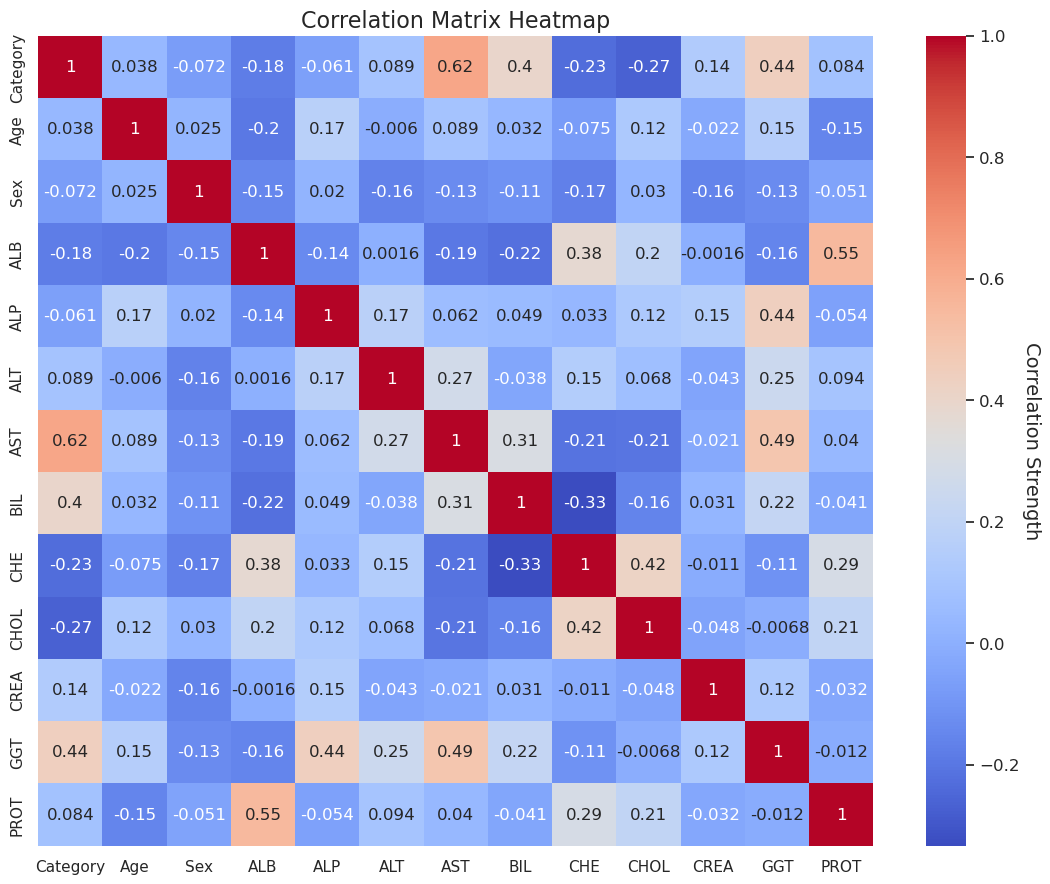

In [20]:
def plot_correlation_matrix_heatmap(data):
    """
    Plot a correlation matrix heatmap.

    Parameters:
    - data (DataFrame): Input DataFrame containing features.

    Returns:
    - None
    """
    # Set plot style
    sns.set(style="whitegrid")
    
    # Calculate correlation matrix
    correlation_matrix = data.corr()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Set title
    plt.title("Correlation Matrix Heatmap", fontsize=16)
    
    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
    
    # Customize color bar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
    
    # Show the plot
    plt.show()

# Example usage:
plot_correlation_matrix_heatmap(df)

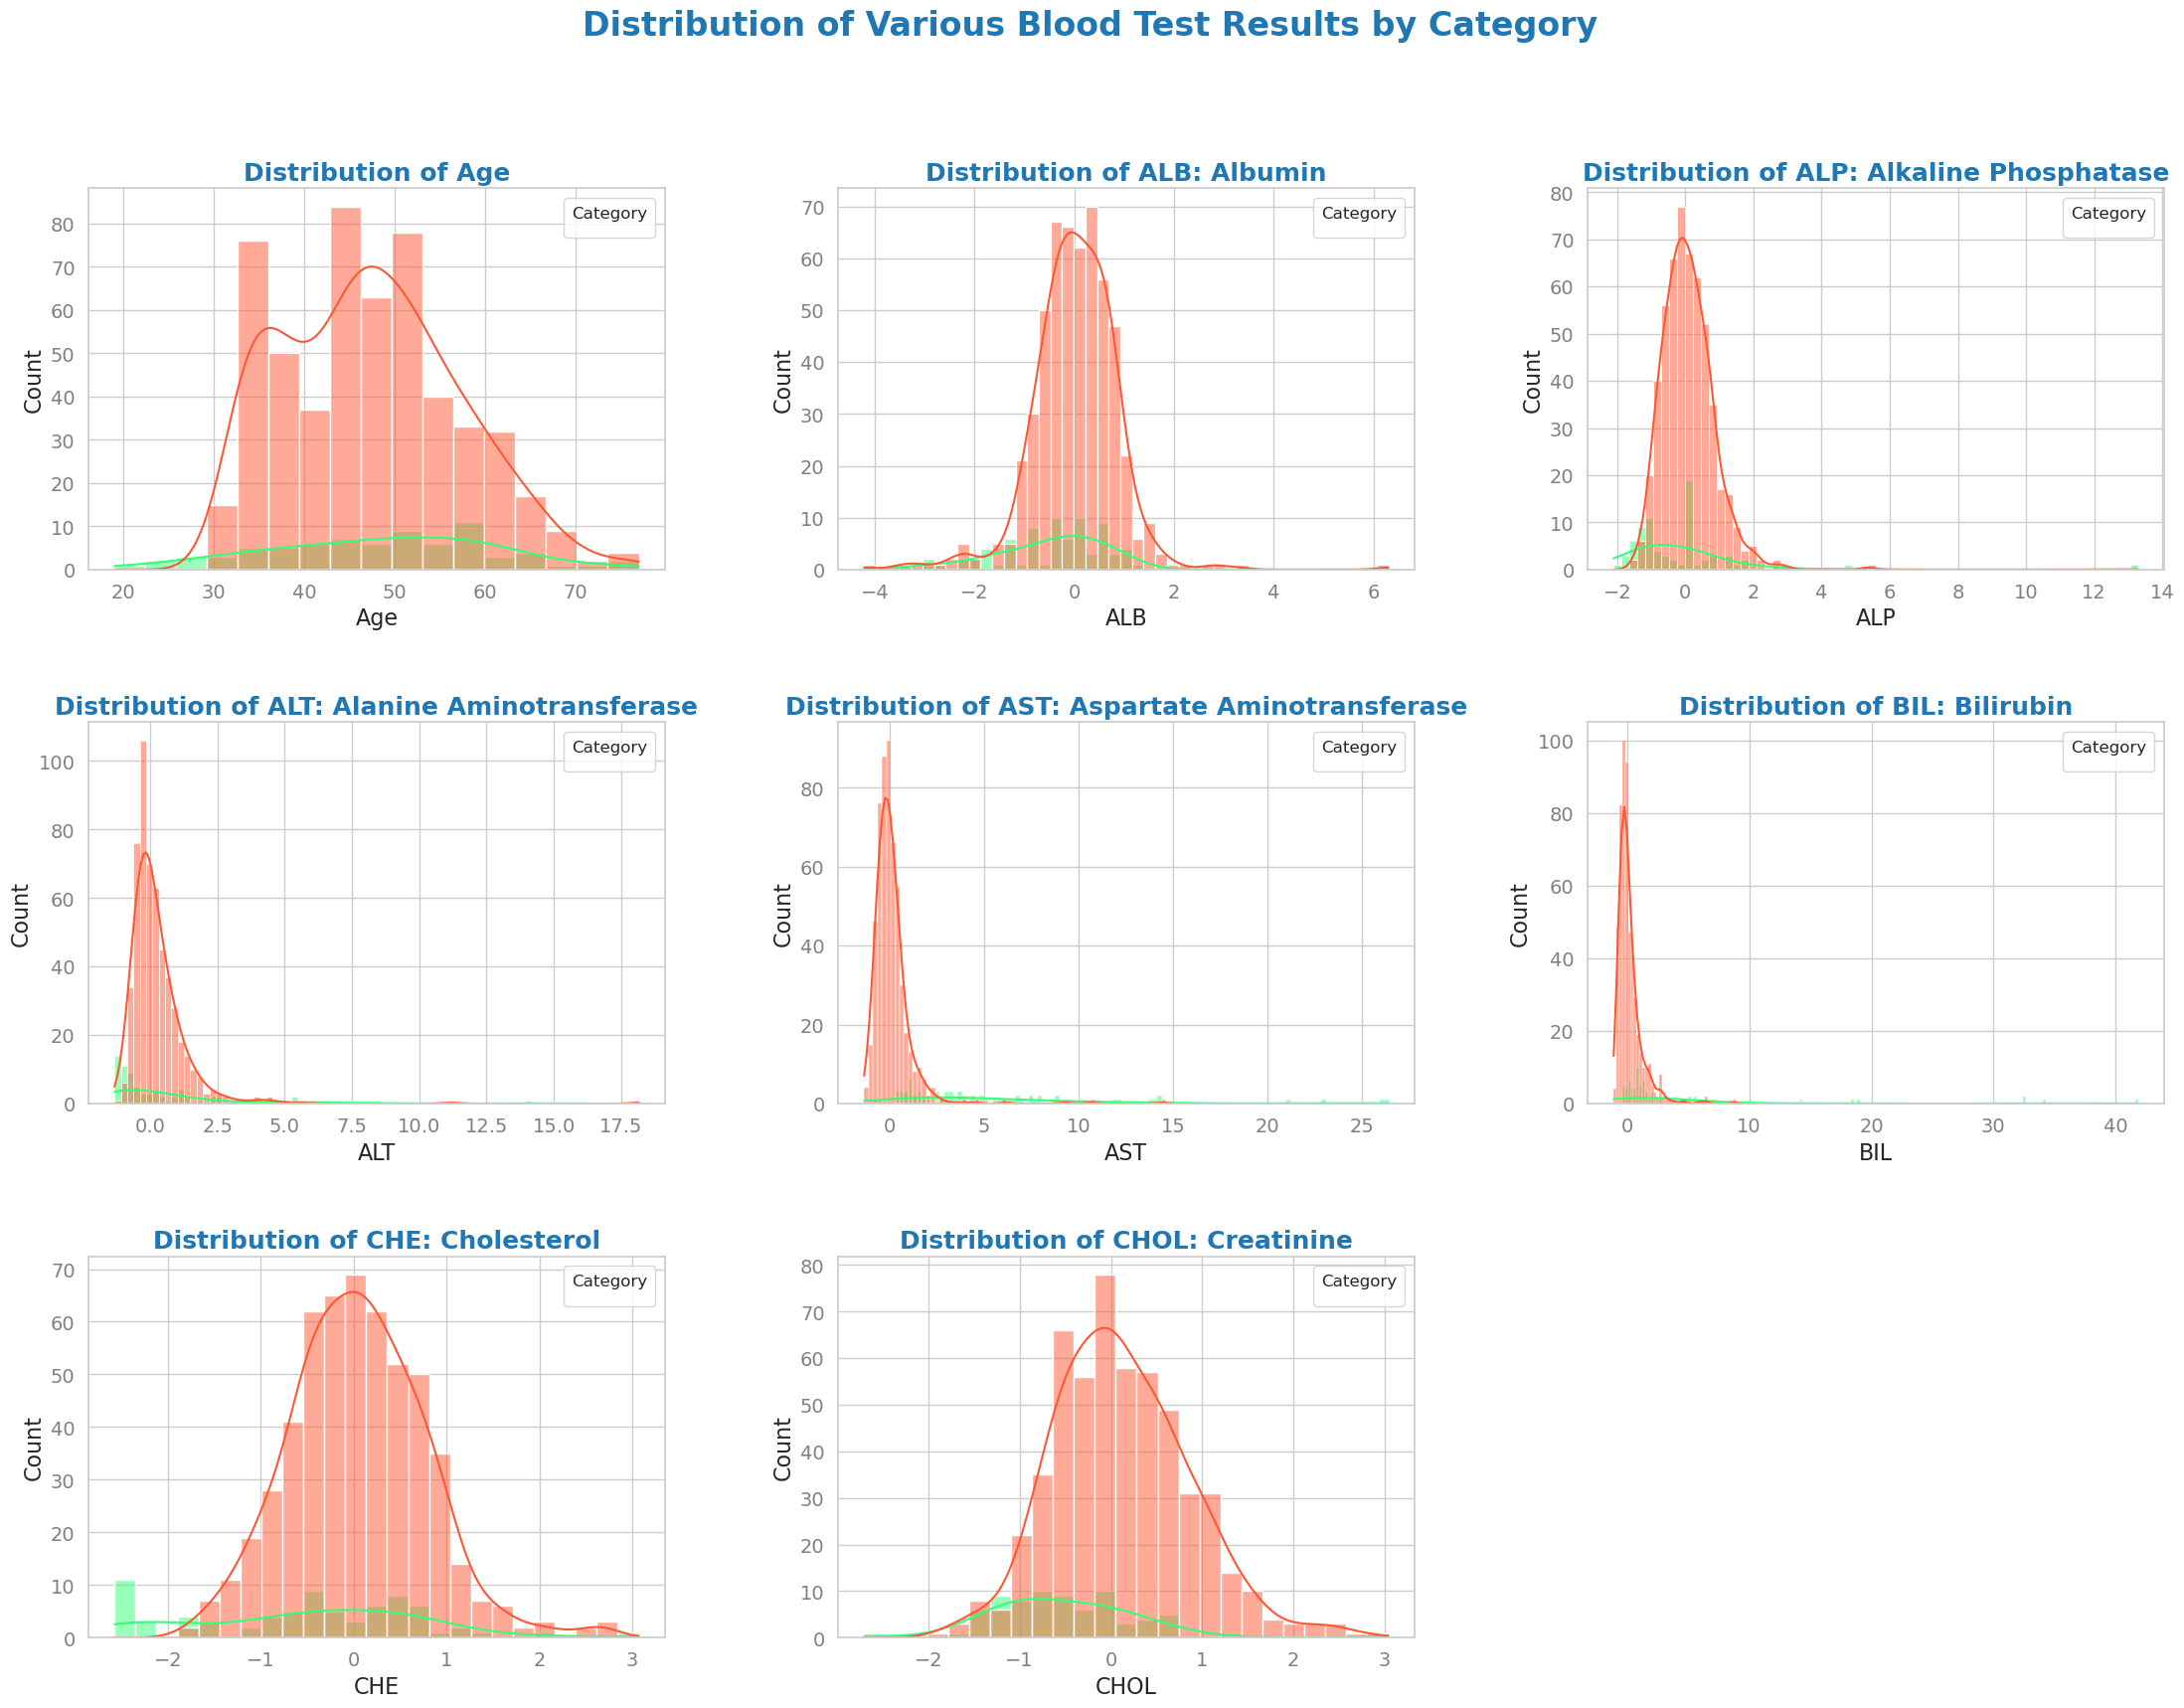

In [21]:
def plot_histograms(df):
    # Set up the figure and axes
    fig, axes = plt.subplots(3, 3, figsize=(24, 18))
    axes = axes.flatten()

    # Define the columns to plot
    columns = ["Age", "ALB: Albumin", "ALP: Alkaline Phosphatase", "ALT: Alanine Aminotransferase", 
               "AST: Aspartate Aminotransferase", "BIL: Bilirubin", "CHE: Cholesterol", 
               "CHOL: Creatinine", "CREA: Creatinine"]

    # Define colors for different categories
    category_colors = ['#FF5733', '#33FF77', '#3399FF', '#FF33EA', '#FFCC33']

    # Loop over each column and plot a histogram with multiple categories
    for i, col in enumerate(columns):
        sns.histplot(x=df[col.split(':')[0].strip()], hue=df["Category"], kde=True, palette=category_colors, ax=axes[i])
        axes[i].set_xlabel(col.split(':')[0].strip(), fontsize=16)  # Increase x-axis label font size
        axes[i].set_ylabel("Count", fontsize=16)  # Increase y-axis label font size
        axes[i].set_title(f"Distribution of {col}", fontsize=18, fontweight='bold', color='#1f77b4')  # Increase title font size and style
        axes[i].legend(fontsize=14, title='Category')  # Increase legend font size and add title
        axes[i].tick_params(axis='both', labelsize=14, colors='gray')  # Increase tick label font size and change color

    # Add a main title to the figure
    fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24, fontweight='bold', color='#1f77b4')

    # Remove the last subplot
    fig.delaxes(axes[-1])

    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Add more spacing between subplots

    # Show the plot
    plt.show()

# Example usage:
plot_histograms(df)

In [27]:
from tabulate import tabulate

def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    # Select only the top 12 features
    data_copy = data_copy
    
    
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    moments_df = pd.DataFrame(moments)
    return moments_df

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(df)


Statistical Moments:

+----------+------------+----------+----------------------+------------+------------+
|          |    Mean    |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+==========+============+==========+======================+============+============+
| Category |  0.121951  |    0     |       0.327496       |  2.31626   |  3.37601   |
+----------+------------+----------+----------------------+------------+------------+
|   Age    |  47.4081   |    47    |       10.0551        |  0.267134  | -0.386473  |
+----------+------------+----------+----------------------+------------+------------+
|   Sex    |  0.386992  |    0     |       0.487458       |  0.465176  |  -1.78944  |
+----------+------------+----------+----------------------+------------+------------+
|   ALB    | -0.0437195 |    0     |       0.902488       | -0.176911  |  5.99786   |
+----------+------------+----------+----------------------+------------+------------+
|   ALP    | 0.0601108  |    0 

<p style="background-color:#66c2ff; font-family: Arial, sans-serif; font-size: 150%; color: white; text-align: center; border-radius: 15px; padding: 12px; border: 2px solid #004080;">Model Training and Evaluation</p>


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


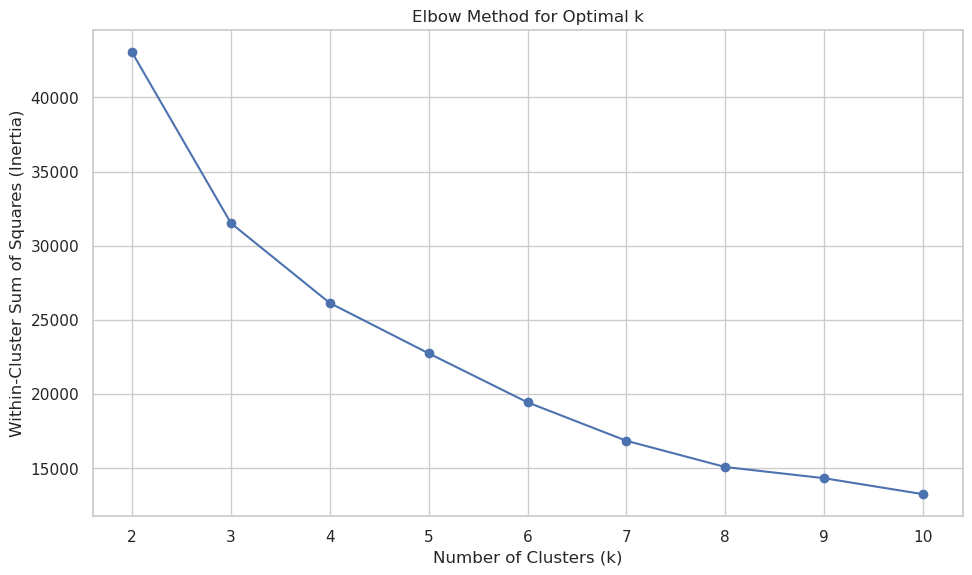

In [23]:
def plot_elbow_curve(X, min_clusters=2, max_clusters=10):
    """
    Plot the elbow curve to determine the optimal number of clusters using the KMeans algorithm.

    Parameters:
    - X (DataFrame): Input features.
    - min_clusters (int): Minimum number of clusters to test.
    - max_clusters (int): Maximum number of clusters to test.

    Returns:
    - None
    """
    # Initialize lists to store inertia values
    inertia_values = []

    # Test different values of k (number of clusters)
    k_values = range(min_clusters, max_clusters + 1)

    for k in k_values:
        # Create KMeans clustering model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

# Example usage:
plot_elbow_curve(X)


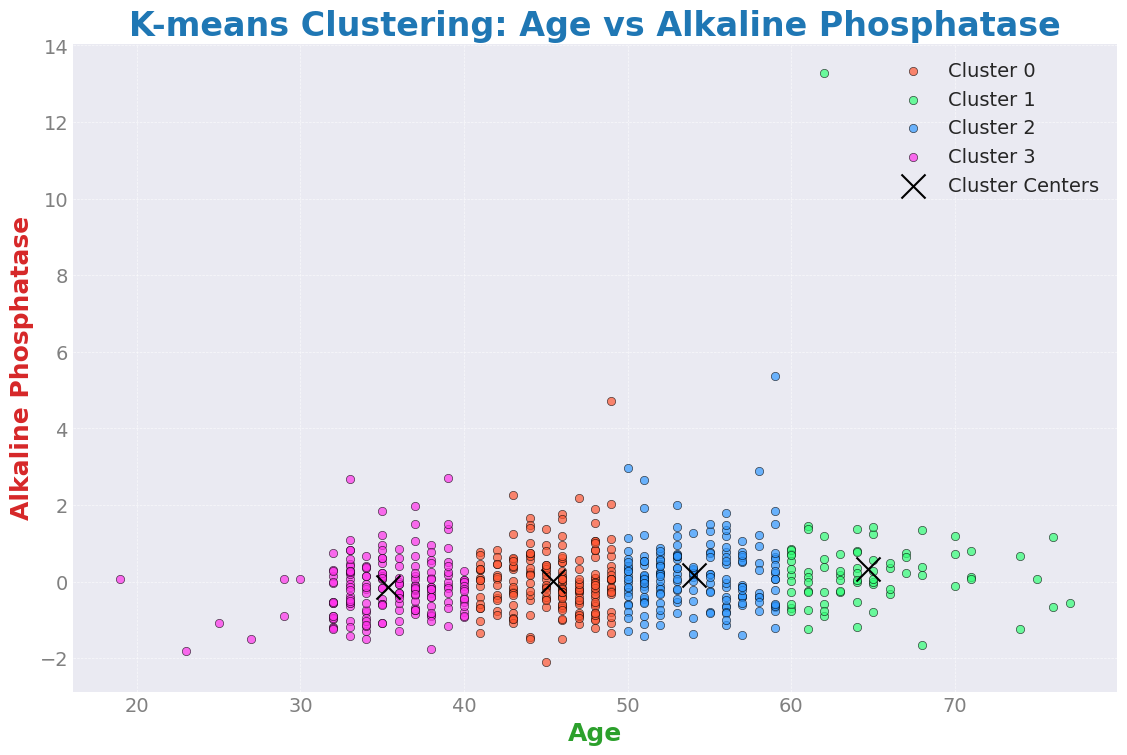

In [24]:

def plot_kmeans_clusters(X, x_col, y_col, num_clusters=4):
    """
    Plot clusters using K-means clustering.

    Parameters:
    - X (DataFrame): Input DataFrame containing features.
    - x_col (str): Column name for x-axis.
    - y_col (str): Column name for y-axis.
    - num_clusters (int): Number of clusters for K-means.

    Returns:
    - None
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit K-means and assign cluster labels
    X['cluster'] = km.fit_predict(X[[x_col, y_col]])
    
    # Set plot style
    plt.style.use('seaborn-darkgrid')
    
    # Define colors for each cluster
    colors = ['#FF5733', '#33FF77', '#3399FF', '#FF33EA']
    
    # Plot clusters with cluster centers
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot each cluster using a different color
    for cluster_label, color in zip(sorted(X['cluster'].unique()), colors):
        cluster_data = X[X['cluster'] == cluster_label]
        ax.scatter(cluster_data[x_col], cluster_data[y_col], label=f'Cluster {cluster_label}', alpha=0.7, color=color, edgecolors='black', linewidth=0.5)
    
    # Plot cluster centers
    cluster_centers = km.cluster_centers_
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')
    
    # Set plot title and labels
    ax.set_title(f'K-means Clustering: Age vs Alkaline Phosphatase', fontsize=24, fontweight='bold', color='#1f77b4')
    ax.set_xlabel('Age', fontsize=18, fontweight='bold', color='#2ca02c')
    ax.set_ylabel('Alkaline Phosphatase', fontsize=18, fontweight='bold', color='#d62728')
    
    # Add legend
    ax.legend(fontsize=14)
    
    # Add grid
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Increase tick label font size and color
    ax.tick_params(axis='both', labelsize=14, colors='gray')
    
    # Show the plot
    plt.show()

# Example usage:
plot_kmeans_clusters(X, 'Age', 'ALP', num_clusters=4)

In [36]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

def train_and_tune_models(X_train, y_train, X_test, y_test):
    """
    Train and tune a logistic regression model using GridSearchCV.

    Parameters:
    - X_train (array-like): Features of the training set.
    - y_train (array-like): Target variable of the training set.
    - X_test (array-like): Features of the testing set.
    - y_test (array-like): Target variable of the testing set.

    Returns:
    - LogisticRegression: Best logistic regression model.
    - float: Accuracy of the best logistic regression model.
    - array-like: Predictions made by the best logistic regression model.
    """
    model = {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l2"],
            "C": [0.01, 0.1, 1, 10],
            "max_iter": [500]
        }
    }

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=5
        )
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")

    return best_model, accuracy, y_pred

# Example usage:
best_model, accuracy, y_pred = train_and_tune_models(X_train, y_train, X_test, y_test)


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.9024390243902439


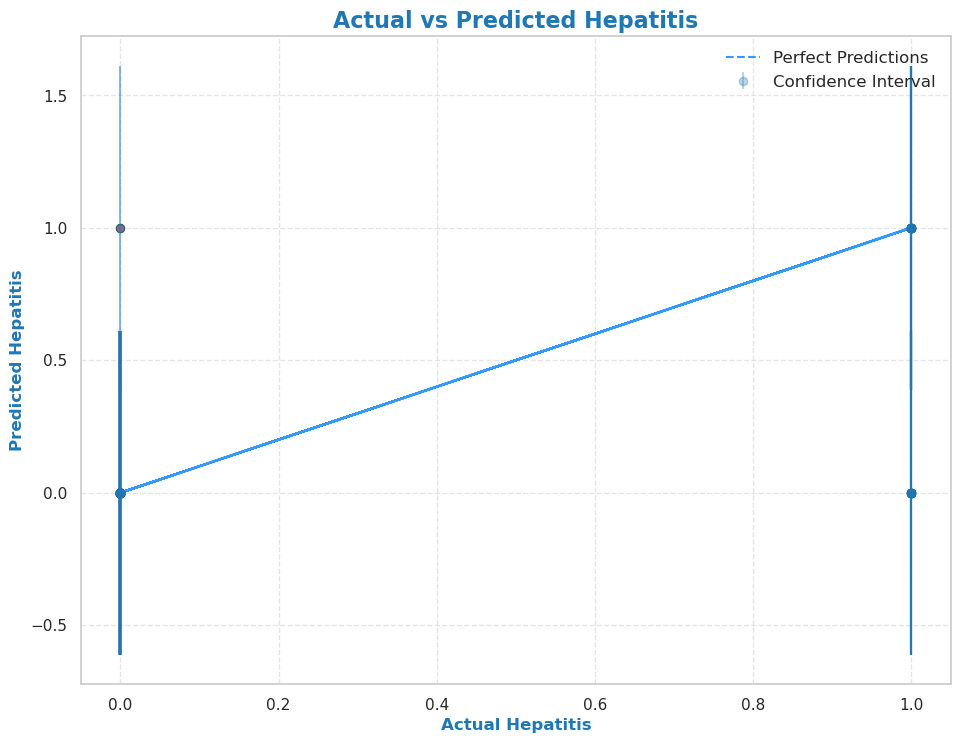

In [55]:
from sklearn.metrics import mean_squared_error

def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot actual vs predicted values with confidence interval and error bars.

    Parameters:
    - y_test (array-like): Array of actual target values.
    - y_pred (array-like): Array of predicted target values.

    Returns:
    - None
    """
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate confidence interval
    confidence_interval = 1.96 * np.sqrt(mse)
    
    # Set up the figure and axes
    plt.figure(figsize=(10, 8))
    
    # Scatter plot of actual vs predicted values with error bars
    sns.scatterplot(x=y_test, y=y_pred, color='#FF5733', alpha=0.7, edgecolor='black', linewidth=0.5)
    
    # Plot the diagonal line for perfect predictions
    plt.plot(y_pred, y_pred, color='#3399FF', linestyle='--', label='Perfect Predictions')
    
    # Plot confidence interval
    plt.errorbar(y_test, y_pred, yerr=confidence_interval, fmt='o', color='#1f77b4', alpha=0.3, label='Confidence Interval')
    
    # Set title and labels
    plt.title('Actual vs Predicted Hepatitis', fontsize=16, fontweight='bold', color='#1f77b4')
    plt.xlabel('Actual Hepatitis', fontsize=12, fontweight='bold', color='#1f77b4')
    plt.ylabel('Predicted Hepatitis', fontsize=12, fontweight='bold', color='#1f77b4')
    
    # Add legend and grid
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()

# Example usage:
plot_actual_vs_predicted(y_test, y_pred)